## Convolutional Neural Networks

 - Understanding CNN's Better
 - Building A Small Convnet To Classify MNIST Dataset 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import *
from keras.models import Sequential
from keras.datasets import mnist
from keras.utils import to_categorical

Using TensorFlow backend.


### Loading And Preprocessing Data

In [2]:
(XTrain, YTrain), (XTest, YTest) = mnist.load_data()

In [3]:
def preprocess_data(X, Y):
    X = X.reshape((-1,28,28,1))
    X = X/255.0
    Y = to_categorical(Y)
    return X, Y

In [4]:
XTrain, YTrain = preprocess_data(XTrain, YTrain)
print(XTrain.shape, YTrain.shape)

XTest, YTest = preprocess_data(XTest, YTest)
print(XTest.shape, YTest.shape)

(60000, 28, 28, 1) (60000, 10)
(10000, 28, 28, 1) (10000, 10)


### Build A Model

In [5]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)               

### Model Compilation and Training

In [6]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])
hist = model.fit(XTrain, YTrain, epochs=6, validation_split=0.1, batch_size=128)

Train on 54000 samples, validate on 6000 samples
Epoch 1/6
54000/54000 [==============================] - 37s 678us/step - loss: 0.2895 - accuracy: 0.9143 - val_loss: 0.0680 - val_accuracy: 0.9812
Epoch 2/6
54000/54000 [==============================] - 36s 673us/step - loss: 0.0640 - accuracy: 0.9803 - val_loss: 0.0506 - val_accuracy: 0.9863
Epoch 3/6
54000/54000 [==============================] - 36s 675us/step - loss: 0.0451 - accuracy: 0.9855 - val_loss: 0.0453 - val_accuracy: 0.9877
Epoch 4/6
54000/54000 [==============================] - 36s 675us/step - loss: 0.0350 - accuracy: 0.9890 - val_loss: 0.0392 - val_accuracy: 0.9897
Epoch 5/6
54000/54000 [==============================] - 36s 673us/step - loss: 0.0296 - accuracy: 0.9900 - val_loss: 0.0369 - val_accuracy: 0.9898
Epoch 6/6
54000/54000 [==============================] - 36s 672us/step - loss: 0.0239 - accuracy: 0.9924 - val_loss: 0.0369 - val_accuracy: 0.9902


In [7]:
test_loss, test_acc = model.evaluate(XTest, YTest)
print("\nTesting Accuracy : ", round(100*test_acc, 2), "%")

10000/10000 [==============================] - 2s 238us/step

Testing Accuracy :  99.01 %


In [8]:
train_loss, train_acc = model.evaluate(XTrain, YTrain)
print("\nTraining Accuracy : ", round(100*train_acc, 2), "%")

60000/60000 [==============================] - 18s 296us/step

Training Accuracy :  99.45 %


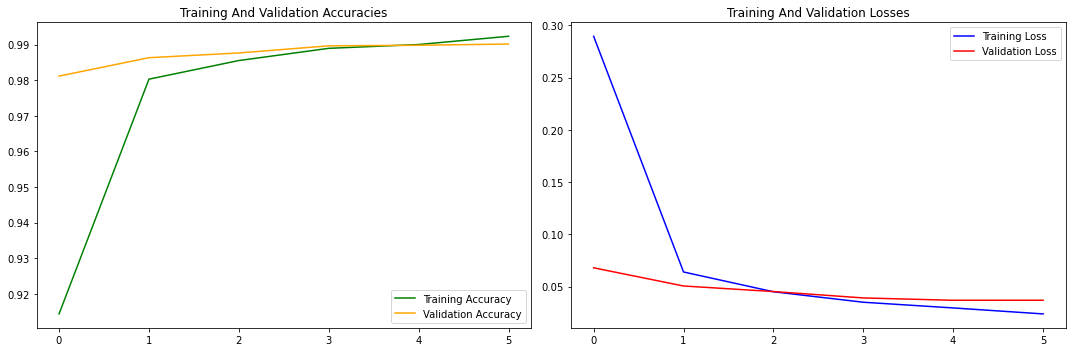

In [9]:
train_acc = hist.history["accuracy"]
valid_acc = hist.history["val_accuracy"]
train_loss = hist.history["loss"]
valid_loss = hist.history["val_loss"]

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(train_acc, label="Training Accuracy", color="green")
plt.plot(valid_acc, label="Validation Accuracy", color="orange")
plt.legend()
plt.title("Training And Validation Accuracies")
plt.subplot(1,2,2)
plt.plot(train_loss, label="Training Loss", color="blue")
plt.plot(valid_loss, label="Validation Loss", color="red")
plt.legend()
plt.title("Training And Validation Losses")
plt.tight_layout()
plt.show()

### Making The Final Model And Training It With 100% Data

In [10]:
model_final = Sequential()
model_final.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model_final.add(MaxPool2D((2,2)))
model_final.add(Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)))
model_final.add(MaxPool2D((2,2)))
model_final.add(Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)))
model_final.add(Flatten())
model_final.add(Dense(64, activation='relu'))
model_final.add(Dense(10, activation='softmax'))
model_final.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)               

In [11]:
model_final.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])
hist = model_final.fit(XTrain, YTrain, epochs=7, batch_size=128)

Epoch 1/7
60000/60000 [==============================] - 40s 659us/step - loss: 0.2529 - accuracy: 0.9236
Epoch 2/7
60000/60000 [==============================] - 39s 653us/step - loss: 0.0596 - accuracy: 0.9821
Epoch 3/7
60000/60000 [==============================] - 39s 655us/step - loss: 0.0425 - accuracy: 0.9868
Epoch 4/7
60000/60000 [==============================] - 39s 654us/step - loss: 0.0331 - accuracy: 0.9896
Epoch 5/7
60000/60000 [==============================] - 39s 651us/step - loss: 0.0270 - accuracy: 0.9915
Epoch 6/7
60000/60000 [==============================] - 39s 654us/step - loss: 0.0231 - accuracy: 0.9930
Epoch 7/7
60000/60000 [==============================] - 39s 656us/step - loss: 0.0183 - accuracy: 0.9941


In [12]:
test_loss, test_acc = model_final.evaluate(XTest, YTest)
print("\nTesting Accuracy : ", round(100*test_acc, 2), "%")

10000/10000 [==============================] - 3s 274us/step

Testing Accuracy :  98.95 %


In [13]:
train_loss, train_acc = model.evaluate(XTrain, YTrain)
print("\nTraining Accuracy : ", round(100*train_acc, 2), "%")

60000/60000 [==============================] - 20s 334us/step

Training Accuracy :  99.45 %


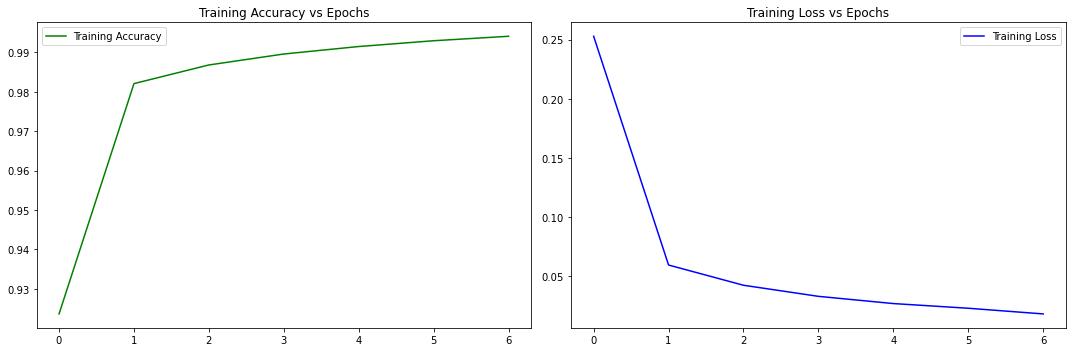

In [14]:
train_acc = hist.history["accuracy"]
train_loss = hist.history["loss"]

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(train_acc, label="Training Accuracy", color="green")
plt.legend()
plt.title("Training Accuracy vs Epochs")
plt.subplot(1,2,2)
plt.plot(train_loss, label="Training Loss", color="blue")
plt.legend()
plt.title("Training Loss vs Epochs")
plt.tight_layout()
plt.show()